In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
url = 'https://github.com/idandrd/israel-covid19-data/raw/master/IsraelCOVID19.csv'
df = pd.read_csv(url, index_col=0)


In [3]:
df

,Total Cases,New Cases,בינוני Moderate,קשה Severe,נפטרו Deceased,Total Recovered,New Recovered,נבדקים היום Tested Today,"סה""כ נבדקים Total Tested",אחוז חיוביים Percent Positive,GF Normalized to Tests,Baseline
Date,,,,,,,,,,,,
21/02/2020,2,2.0,NaN,NaN,NaN,NaN,NaN,15.0,472,NaN,NaN,NaN
22/02/2020,6,4.0,NaN,NaN,NaN,NaN,NaN,13.0,485,NaN,NaN,NaN
23/02/2020,11,5.0,NaN,NaN,NaN,NaN,NaN,75.0,560,NaN,NaN,NaN
24/02/2020,16,5.0,NaN,NaN,NaN,NaN,NaN,58.0,618,NaN,NaN,NaN
25/02/2020,18,2.0,NaN,NaN,NaN,NaN,NaN,104.0,722,1.92,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
30/04/2020,15995,149.0,79.0,105.0,222.0,8412.0,411.0,9834.0,373882,1.52,1.64,1.0
01/05/2020,16004,116.0,82.0,103.0,225.0,8758.0,346.0,10765.0,385922,1.08,0.71,1.0
02/05/2020,16170,57.0,67.0,105.0,229.0,9526.0,260.0,5555.0,392660,1.03,0.95,1.0


In [4]:
df['actual'] = df['Total Cases'] - df['Total Recovered']

In [5]:
df['actual_no_death'] = df['actual'] - df['נפטרו Deceased']

In [6]:
df[40:]

,Total Cases,New Cases,בינוני Moderate,קשה Severe,נפטרו Deceased,Total Recovered,New Recovered,נבדקים היום Tested Today,"סה""כ נבדקים Total Tested",אחוז חיוביים Percent Positive,GF Normalized to Tests,Baseline,actual,actual_no_death
Date,,,,,,,,,,,,,,
01/04/2020,6409,695.0,129.0,95.0,21.0,330.0,37.0,8213.0,82667,8.46,0.91,1.0,6079.0,6058.0
02/04/2020,7128,719.0,126.0,108.0,29.0,431.0,101.0,9082.0,91749,7.92,0.94,1.0,6697.0,6668.0
03/04/2020,7727,599.0,144.0,113.0,36.0,508.0,77.0,9903.0,101652,6.05,0.76,1.0,7219.0,7183.0
04/04/2020,8156,429.0,165.0,126.0,42.0,571.0,63.0,6647.0,108299,6.45,1.07,1.0,7585.0,7543.0
05/04/2020,8735,579.0,182.0,139.0,46.0,676.0,105.0,9279.0,117578,6.24,0.97,1.0,8059.0,8013.0
06/04/2020,9187,452.0,197.0,140.0,51.0,773.0,97.0,7250.0,124828,6.23,1.00,1.0,8414.0,8363.0
07/04/2020,9566,379.0,189.0,149.0,59.0,854.0,81.0,6592.0,131420,5.75,0.92,1.0,8712.0,8653.0
08/04/2020,9904,338.0,199.0,147.0,71.0,905.0,51.0,5573.0,136993,6.06,1.05,1.0,8999.0,8928.0
09/04/2020,10249,345.0,171.0,166.0,79.0,976.0,71.0,5532.0,142525,6.24,1.03,1.0,9273.0,9194.0


## number of active cases(blue) vs total cases(red)

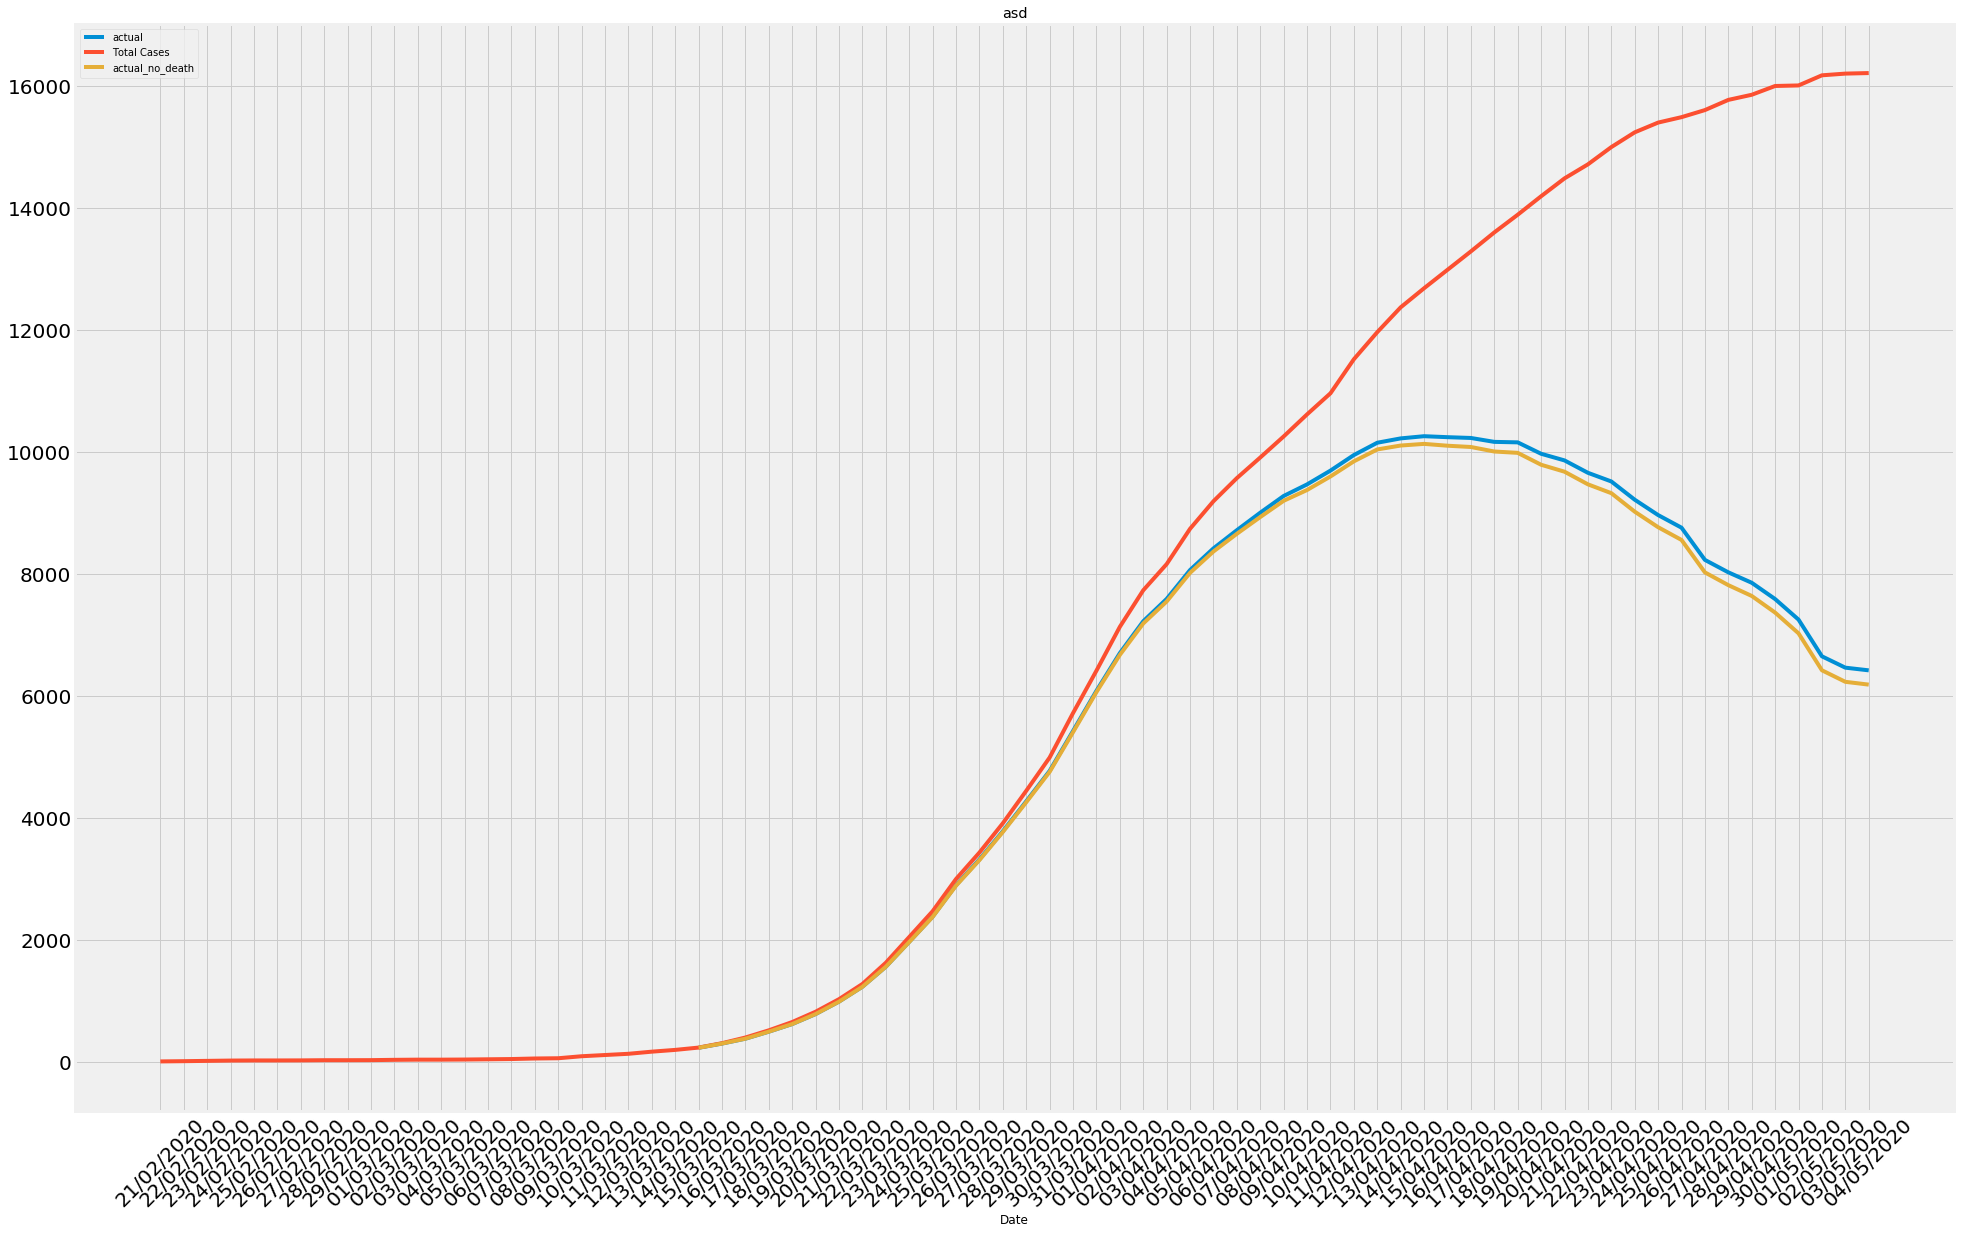

In [7]:
df[['actual','Total Cases','actual_no_death']].plot(kind='line',
                                                    title = 'asd',
                                                    figsize=(30,20),
                                                    rot=45,fontsize=20,
                                                    xticks = range(0,len(df.index)))

## number of moderate(blue), severe(red) and dead(yellow) cases

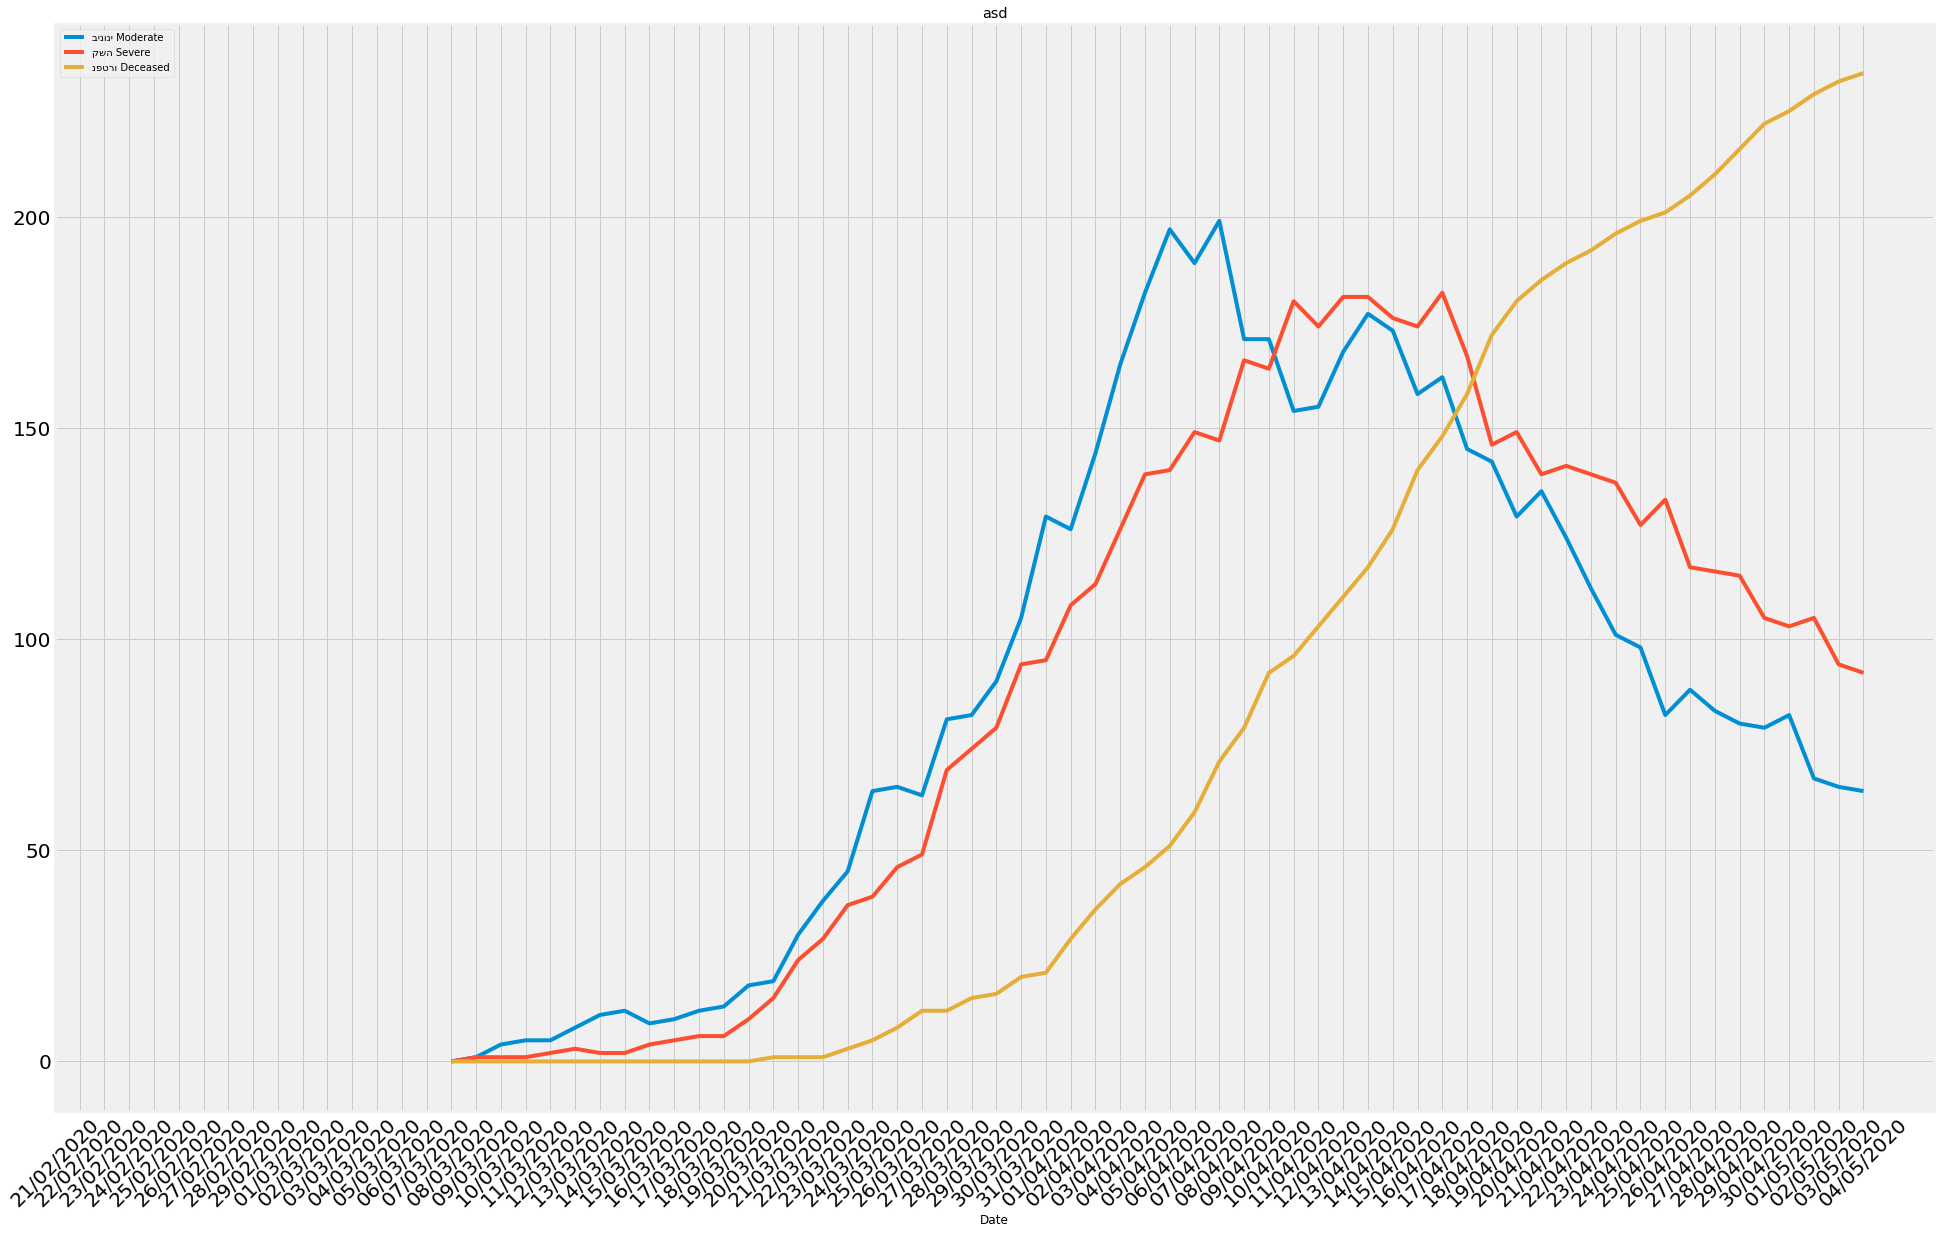

In [8]:
df[['בינוני Moderate','קשה Severe', 'נפטרו Deceased']].plot(kind='line',
                                                    title = 'asd',
                                                    figsize=(30,20),
                                                    rot=45,fontsize=20,
                                                    xticks = range(0,len(df.index)))

## percentage of change in new  cases

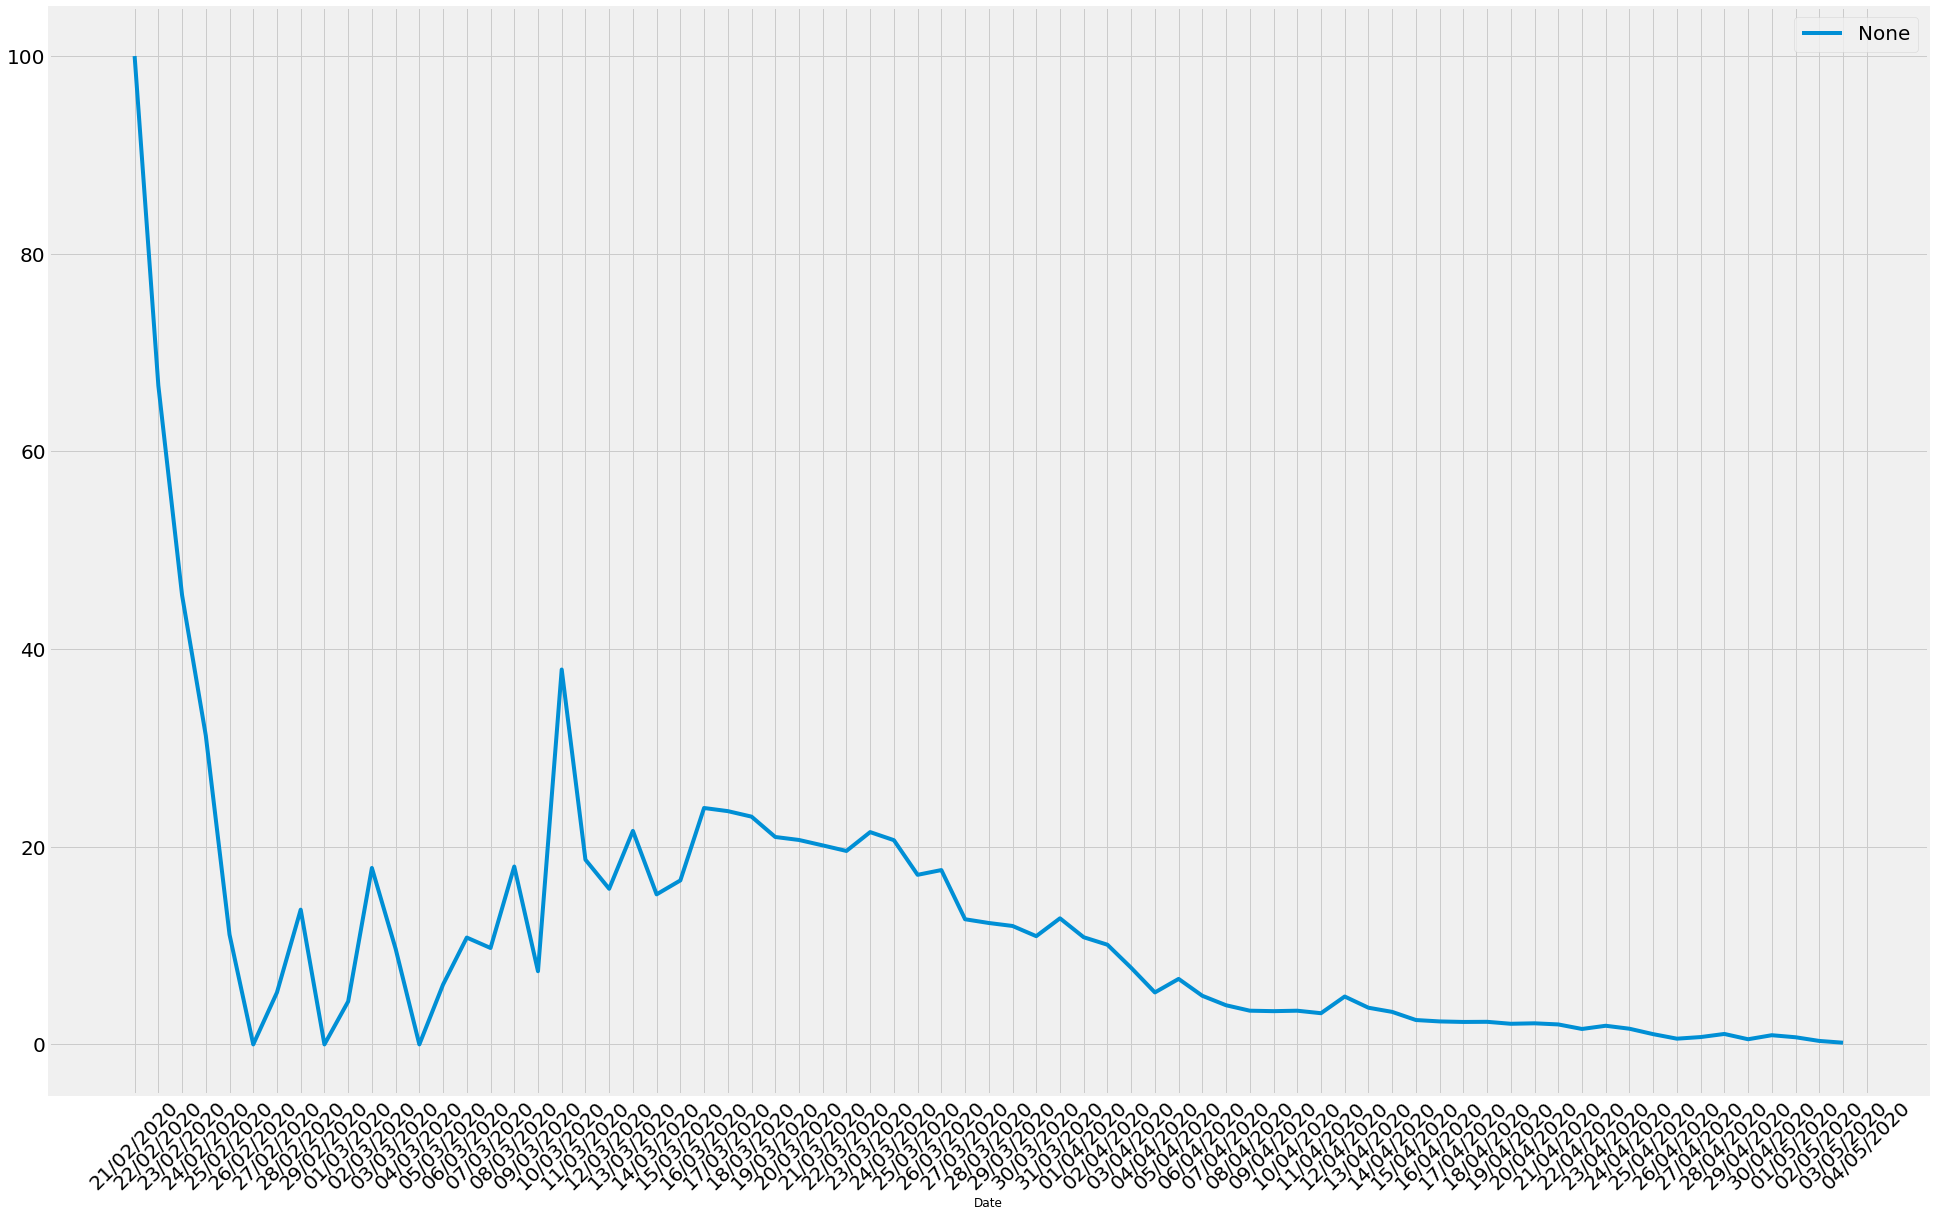

In [9]:
(df['New Cases'] / df['Total Cases'] * 100).plot(kind='line',figsize=(30,20),rot=45,fontsize=20,xticks = range(0,len(df.index))).legend(fontsize=20)

## change in precentage from prev day  of moderate(blue), severe(red) and dead(yellow) and new cases(green)

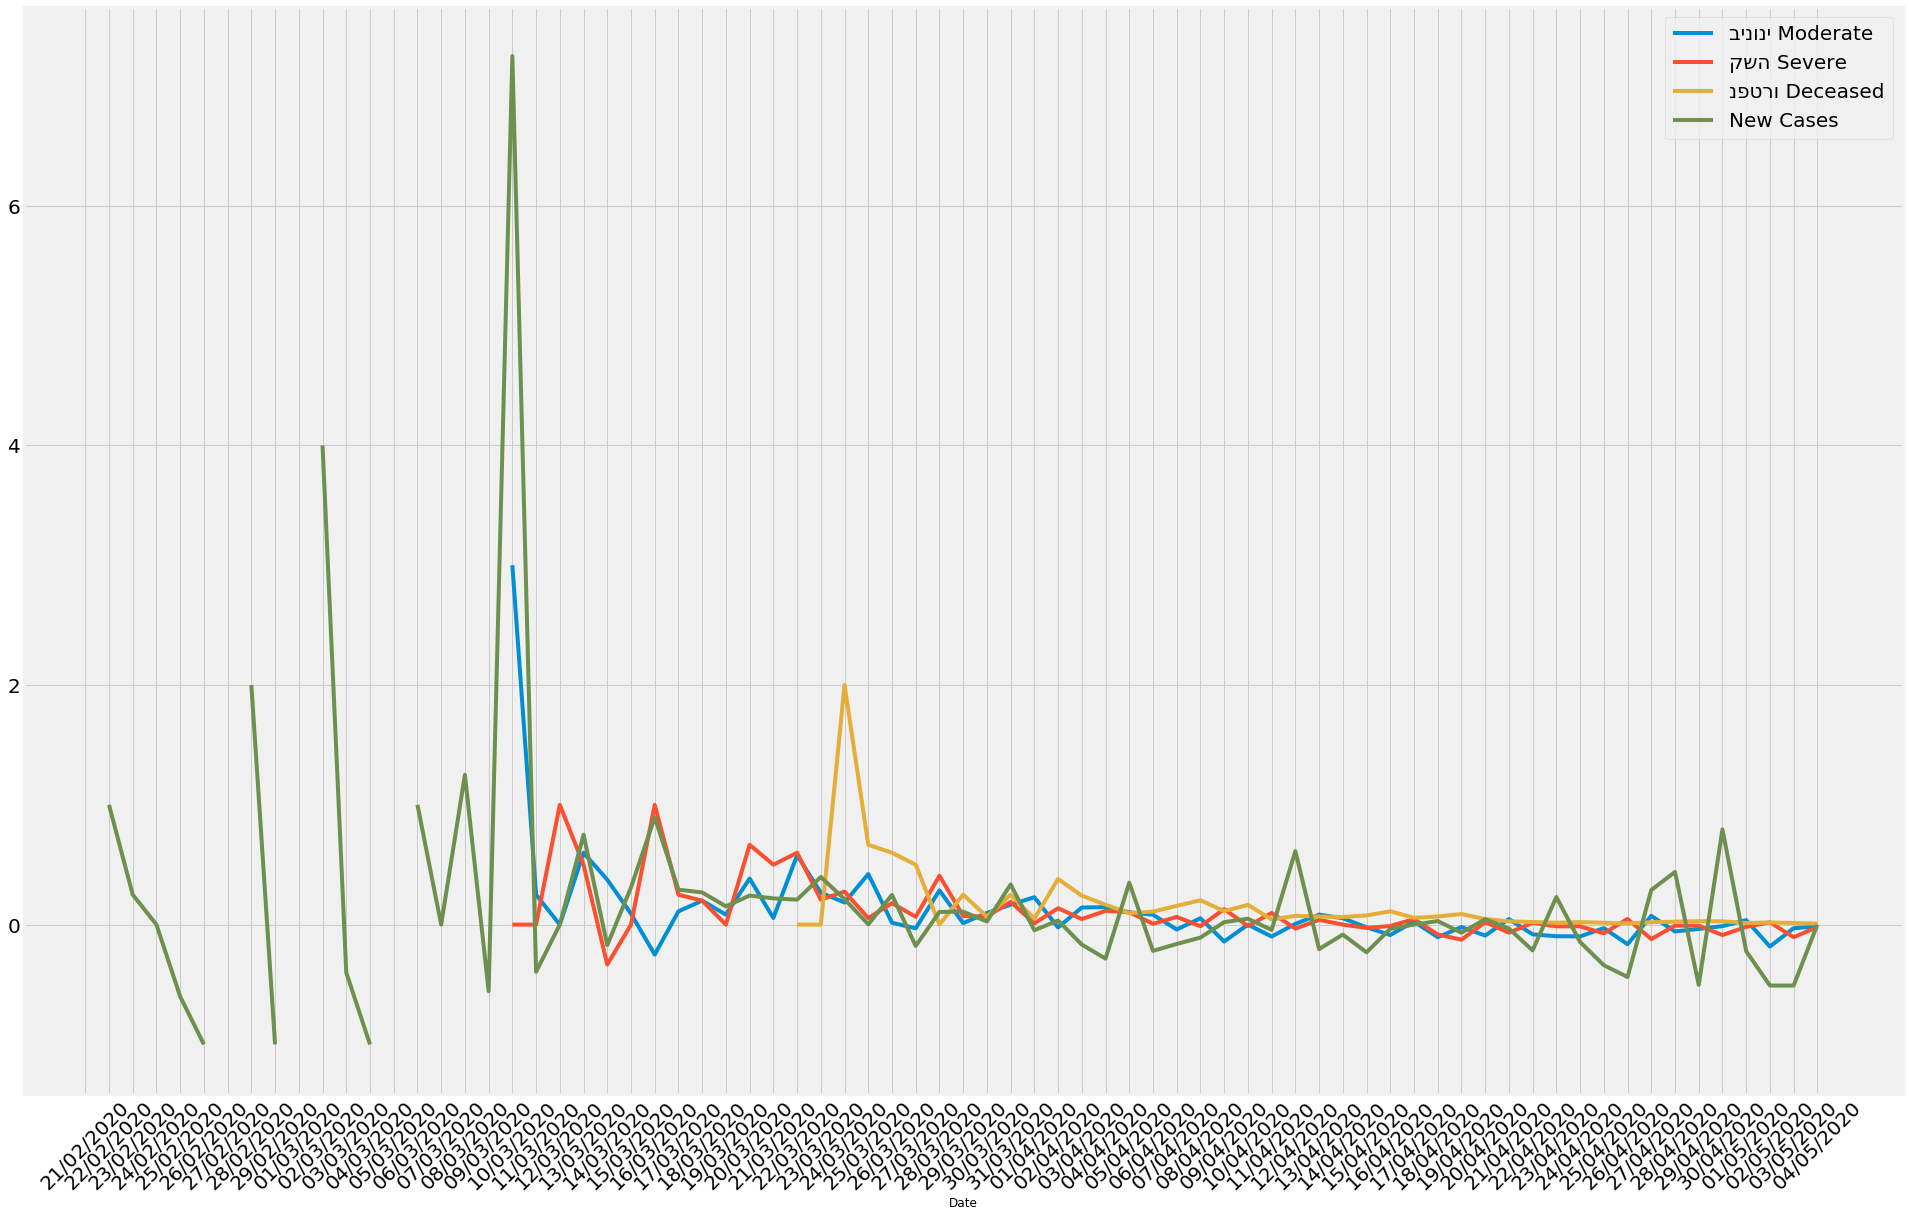

In [10]:
df[['בינוני Moderate','קשה Severe', 'נפטרו Deceased','New Cases']].pct_change().plot(kind='line',figsize=(30,20),rot=45,fontsize=20,xticks = range(0,len(df.index))).legend(fontsize=20)